In [30]:
%matplotlib inline

# useful packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
import time
import pandas as pd

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit.quantum_info import Statevector
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import qiskit

In [68]:
# Cobyla(maxiter = 400)
markers = ["v", "2", "8", 's', 'p', 'P', '*', 'h', '+', 'X']
colors = ['dimgray', 'navy', 'cyan', 'palegreen', 'salmon', 
          'chocolate', 'darkorange', 'teal', 'darkviolet', 'gold']
seeds = np.linspace(201, 1000, 1000 - 200)
Energy = []
execution_time = []

In [86]:
# Energy under different depth
# COBYLA(maxiter = 2000)
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, dpi = 600)
subplots = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
for i in np.arange(1, 11):
    Energy = []
    df = pd.read_excel('depth = ' + str(i) + '.xlsx')
    subplots[i-1].plot(seeds, df['energy'].tolist(), markers[i-1], color = colors[i-1],
            label='depth = ' + str(i))
    subplots[i-1].set_box_aspect(0.75)
    subplots[i-1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15))
    subplots[i-1].grid()

for ax in fig.get_axes():
    ax.label_outer()
fig.set_size_inches(40, 12)
fig.supxlabel('Seeds', fontsize=70)
fig.supylabel('Converged Energy', fontsize=70)
plt.show()
plt.savefig('depths.png', dpi = 2500)

<Figure size 432x288 with 0 Axes>

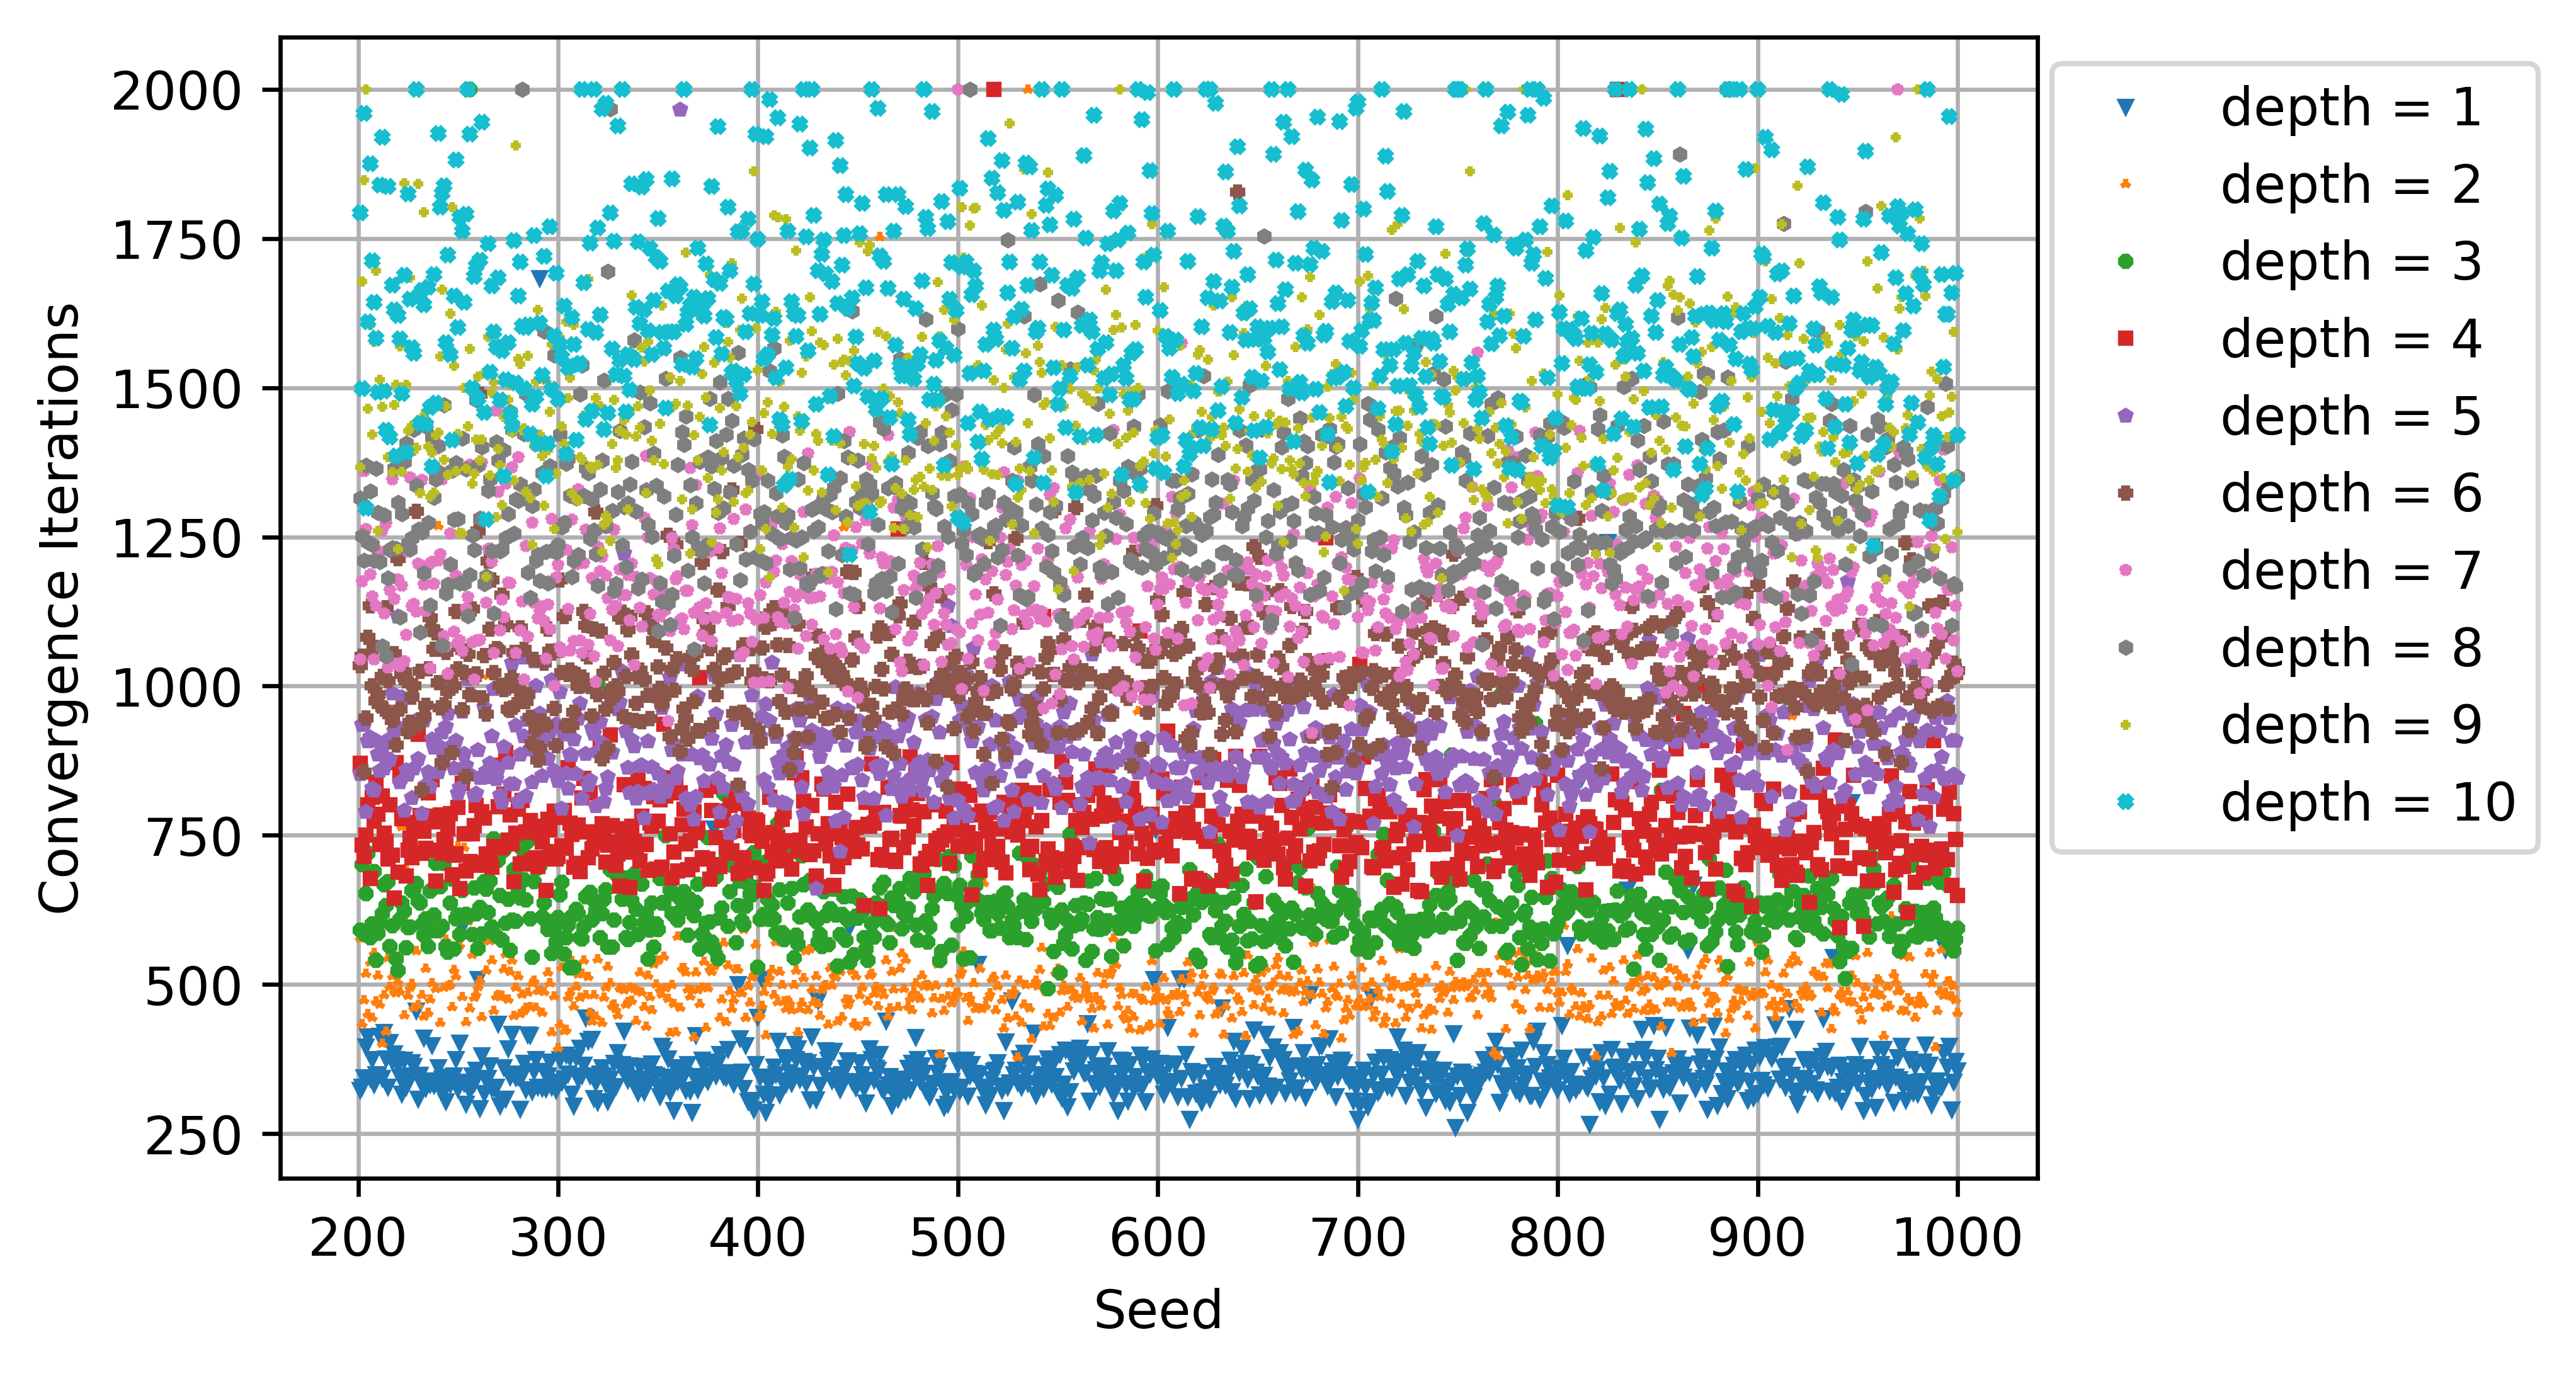

In [77]:
# Converge Iterations:
plt.figure(dpi = 600)
iterations = []
for i in np.arange(1, 11):
    df = pd.read_excel('depth = ' + str(i) + '.xlsx')
    plt.plot(seeds, df['terminate iterations'].tolist(), markers[i-1], markersize = 2,
            label='depth = ' + str(i))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.xlabel("Seed")
plt.ylabel("Convergence Iterations")
plt.grid()
plt.show()

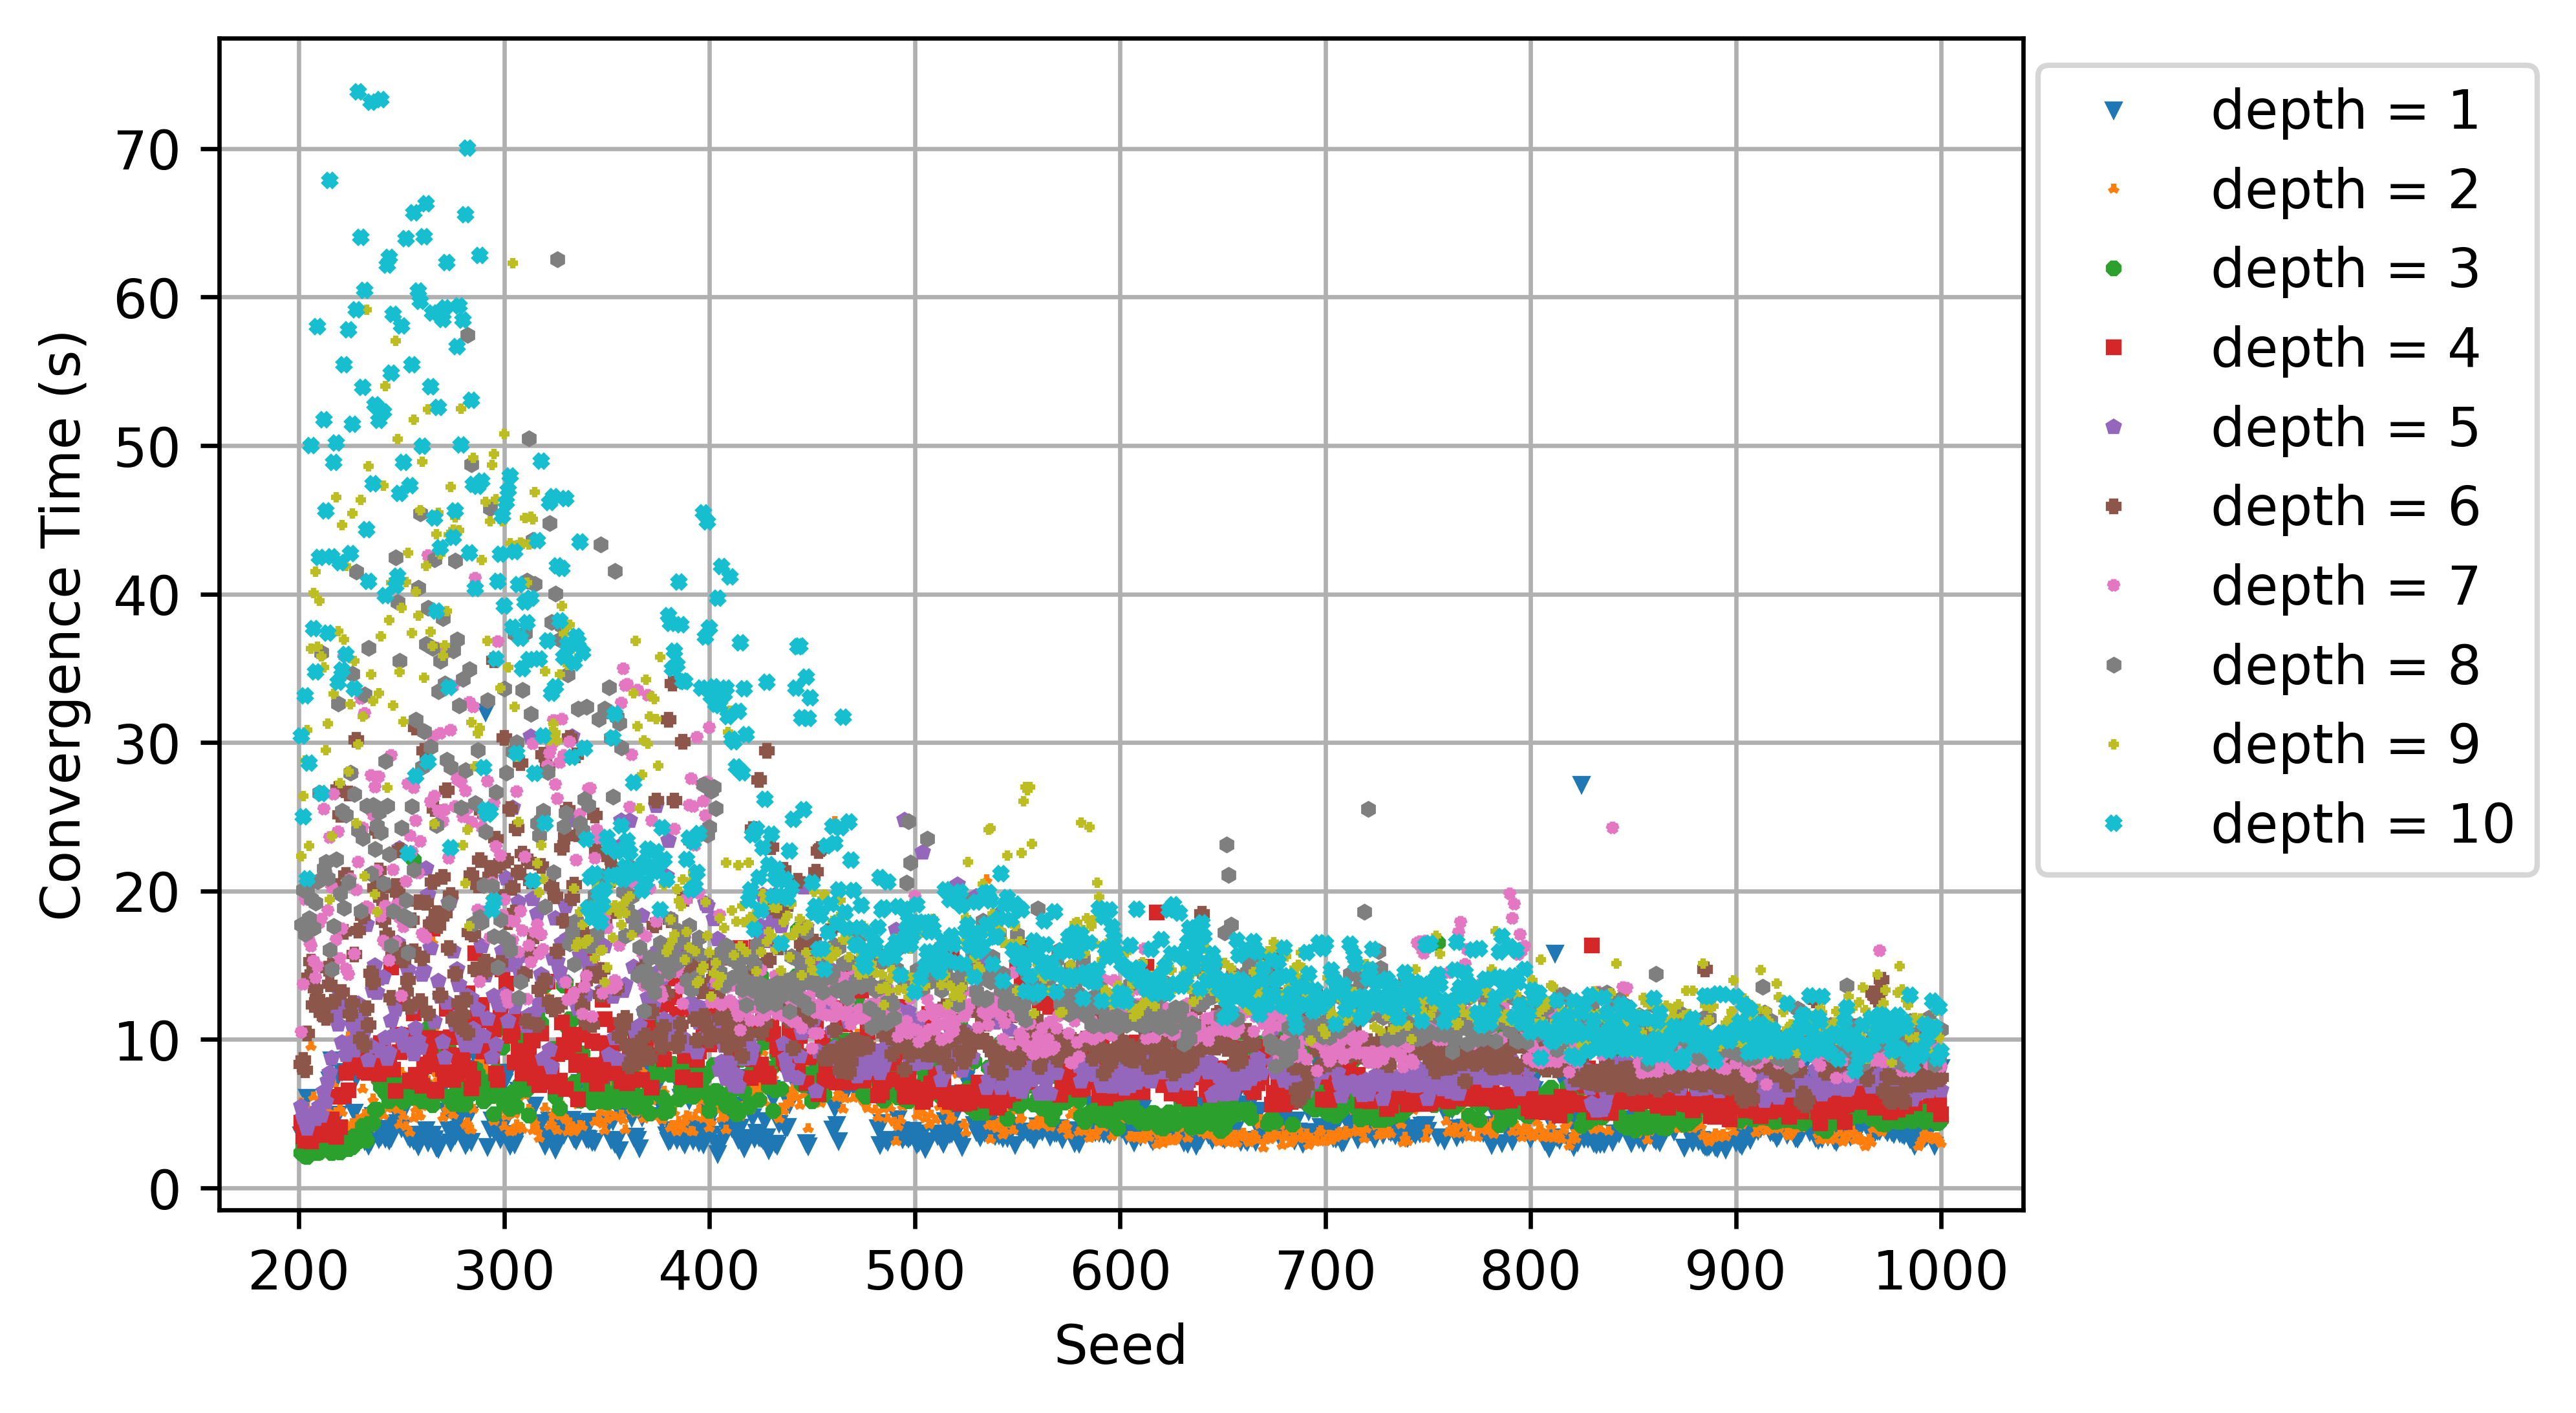

In [78]:
# execution time
plt.figure(dpi = 600)
iterations = []
for i in np.arange(1, 11):
    df = pd.read_excel('depth = ' + str(i) + '.xlsx')
    plt.plot(seeds, df['time (s)'].tolist(), markers[i-1], markersize = 2,
            label='depth = ' + str(i))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.xlabel("Seed")
plt.ylabel("Convergence Time (s)")
plt.grid()
plt.show()